# Testing ESS Event Mode Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

Generated 2000 samples using parameters [0.01111111]
Lorentzian curve maximum likelihood estimation
2000 data points
[0.0001] as initial guess (kappa)
[0.01064987]  +/- [0.00019513]? solution obtained numerically
[0.01064987] solution obtained numerically
That a maximum was found is True via second derivative
[245.95943006 230.69052421 205.44270411 176.55718299 148.72404353
 124.26277752 103.79164644  87.06602717  73.52935611  62.58562785
  53.70617442  46.45721553  40.4954129   35.55333946  31.42383665
  27.9463691   24.99606545  22.47524675  20.30699476  18.43030472
  16.79643753  15.36616869  14.10770485  12.99509725  12.00702616
  11.12586341  10.33694457   9.62800002   8.98870744   8.4103373
   7.88547047   7.40777178   6.97180739   6.57289672   6.20699169
   5.87057776   5.56059241   5.27435766   5.00952398   4.76402344
   4.53603042   4.32392853   4.12628265   3.94181523   3.76938604
   3.60797497   3.4566672    3.3146405    3.18115424   3.05553994]
[260 203 197 182 163 122 106 

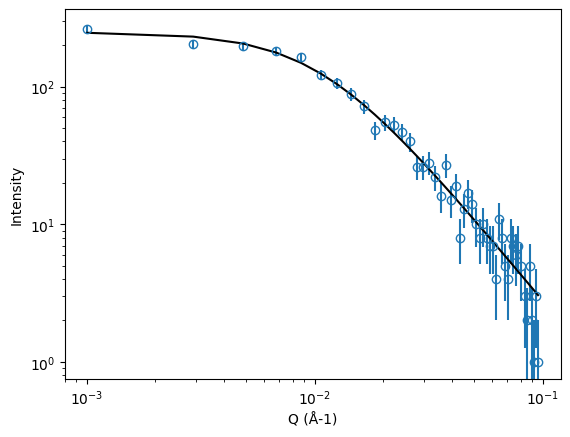

In [2]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [74]:
reload(emtk)
curv = emtk.lorentzianCurve()
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


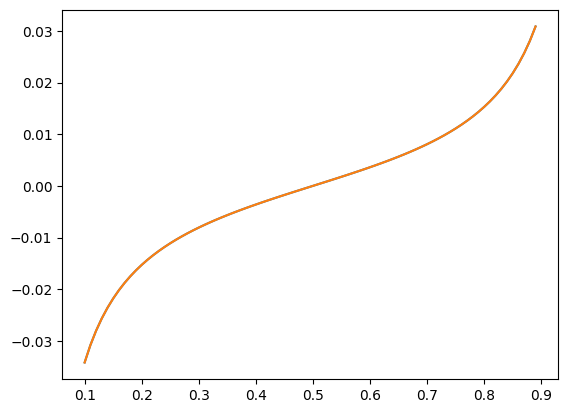

In [75]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [76]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [77]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [78]:
curv.cdf(pars, curv.Quantile(pars, 0.4))

0.4

In [79]:
curv.cdf(pars, curv.nQuantile(pars, 0.4))

array([0.4])

Generated 50 samples using parameters [0.01428571]
[0.01267558] [[0.00027556]]
[0.01244007] [0.00233587]


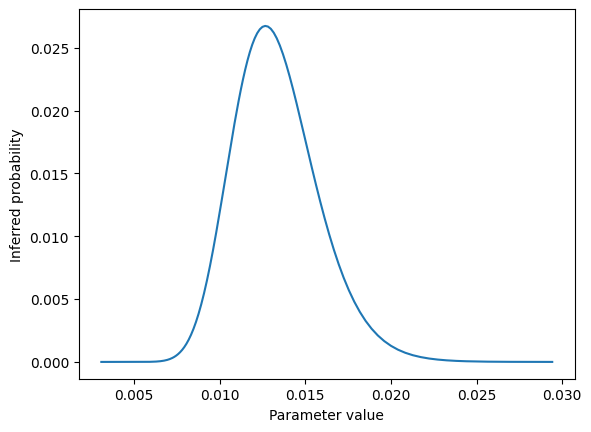

In [121]:
# Bayesian Inference

import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 70.0 # correlation length in system

kappa = 1.0 / clength
curvMLE = emtk.lorentzianCurve()
curvBayes=emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curvMLE.generateTestSamples(pvalues, xrange, 50)
#curvMLE.generatebackground(xrange, ratio=0.1)
curvBayes.data = curvMLE.data
curvBayes.infer(plot=True)
curvMLE.mle()
print(curvMLE.estimates, curvMLE.variances)
print(curvBayes.estimates, curvBayes.variances)

[4.76773774 4.58006189 4.2558332  3.85141335 3.42046811 3.00201387
 2.6184785  2.27929583 1.98569431 1.73457    1.52100346 1.33967622
 1.18556919 1.0542476  0.94192982 0.84545431 0.76220604 0.69003313
 0.62716776 0.57215668 0.52380272 0.48111671 0.44327829 0.40960441
 0.3795239  0.35255713 0.32829956 0.30640851 0.28659252 0.26860264
 0.25222538 0.23727698 0.22359865 0.21105268 0.19951926 0.18889377
 0.17908459 0.1700112  0.16160266 0.15379629 0.14653651 0.13977398
 0.13346473 0.1275695  0.12205315 0.11688416 0.1120342  0.10747775
 0.10319176 0.09915538]
[4 6 2 5 2 2 5 1 4 2 2 1 0 1 0 0 4 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


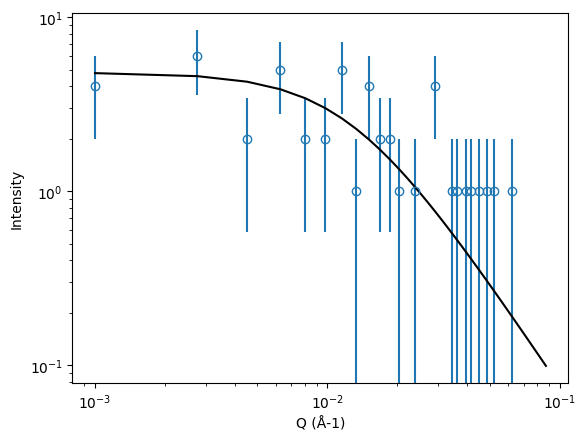

[4.84851457 4.65070719 4.31036291 3.88828751 3.4414894  3.01053618
 2.61802545 2.27286463 1.97556152 1.7223484  1.50778237 1.32616428
 1.17221101 1.04131012 0.929563   0.83373243 0.75115539 0.67965026
 0.61743139 0.5630355  0.51526037 0.4731149  0.4357788  0.40257025
 0.37291997 0.34635056 0.32245984 0.30090751 0.28140439 0.26370369
 0.24759395 0.23289327 0.21944457 0.20711172 0.1957763  0.18533502
 0.17569739 0.16678399 0.15852482 0.15085808 0.14372898 0.1370889
 0.1308945  0.12510713 0.11969219 0.11461864 0.10985859 0.10538694
 0.10118099 0.09722026]
[4 6 2 5 2 2 5 1 4 2 2 1 0 1 0 0 4 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


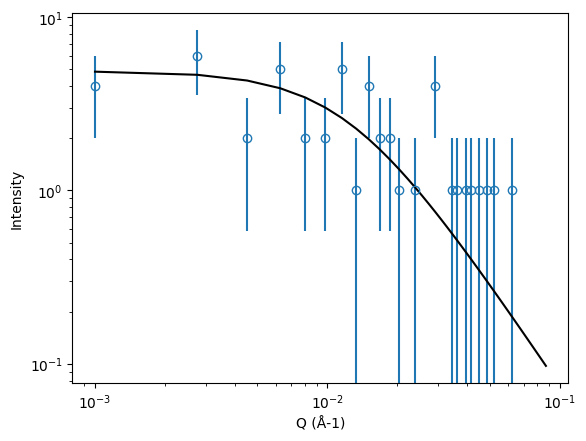

In [122]:
curvMLE.plotFit(logarithmic=True)
curvBayes.plotFit(logarithmic=True)

## Hard Spheres

Generated 10000 samples using parameters [75.]
Hard sphere model maximum likelihood estimation
10000 data points
[80.] as initial guesses (R, Angstroms)
[75.37635153] solution obtained numerically
The second derivative indicates that this is a maximum
[6.42850109e+02 6.38688250e+02 6.30906875e+02 6.19620099e+02
 6.04992489e+02 5.87235600e+02 5.66603550e+02 5.43387751e+02
 5.17910922e+02 4.90520540e+02 4.61581903e+02 4.31470959e+02
 4.00567090e+02 3.69246020e+02 3.37873016e+02 3.06796530e+02
 2.76342427e+02 2.46808920e+02 2.18462309e+02 1.91533599e+02
 1.66216036e+02 1.42663607e+02 1.20990470e+02 1.01271315e+02
 8.35425733e+01 6.78044349e+01 5.40235519e+01 4.21363430e+01
 3.20527713e+01 2.36604755e+01 1.68291233e+01 1.14148638e+01
 7.26475310e+00 4.22103988e+00 2.12520702e+00 8.21677787e-01
 1.61112216e-01 3.23493267e-03 2.19153661e-01 6.93145488e-01
 1.32390533e+00 2.02526757e+00 2.72642691e+00 3.37169787e+00
 3.91986330e+00 4.34317115e+00 4.62604495e+00 4.76357696e+00
 4.75987400e+00 

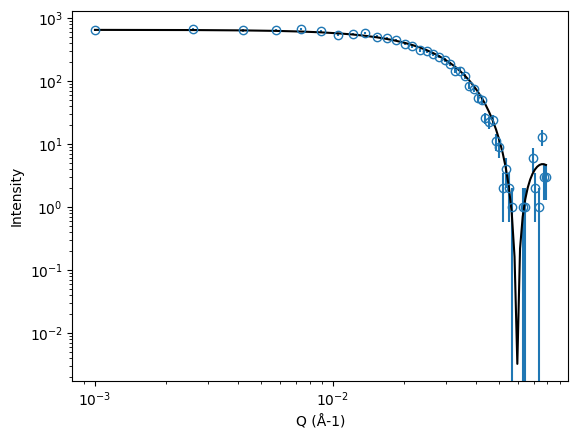

In [4]:
reload(emtk)
curv = emtk.hardSphereCurve()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 10000)
curv.guesses = np.array([80.0])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 400.0 points
Hard sphere model maximum likelihood estimation
4400 data points
[80.] as initial guesses (R, Angstroms)
[80.03241] solution obtained numerically
The second derivative indicates that this is not a maximum


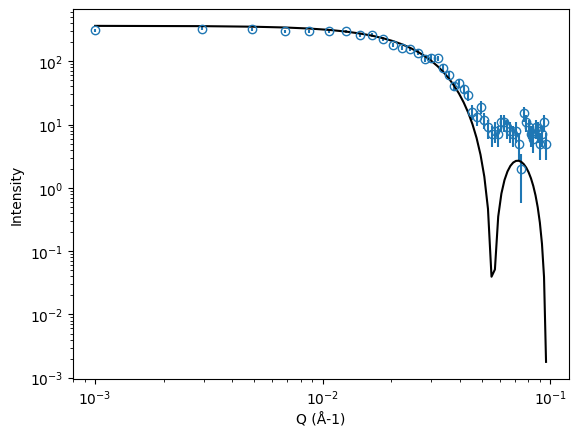

In [7]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Porod Scattering

Generated 6000 samples using parameters [4.e+00 1.e-03]
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6000 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.04323553e+00 1.19224147e-03] solution obtained analytically


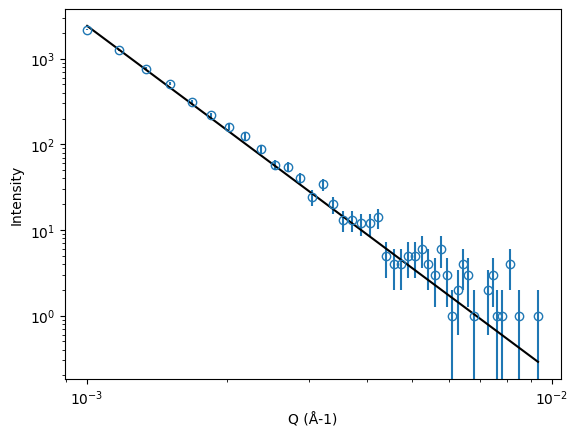

In [9]:
reload(emtk)
curv = emtk.porodCurve()
pvalues = np.array([4.0, 0.001])
xrange = np.array([0.001, 0.01])
curv.generateTestSamples(pvalues, xrange, 6000)
curv.guesses = np.array([3.6, 0.005])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 6.0 points
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6006 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.00962817e+00 1.13120372e-03] solution obtained analytically


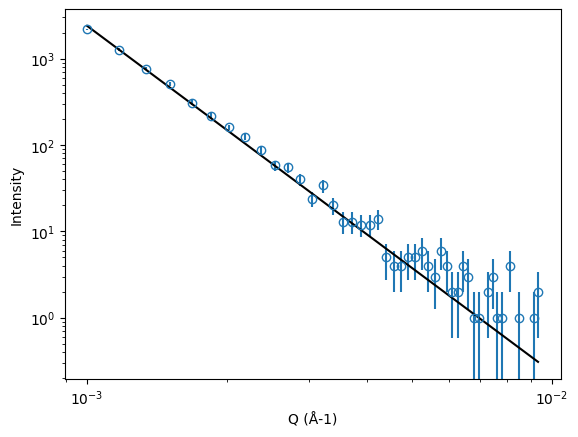

In [10]:
curv.generatebackground(xrange, ratio=1.0E-03)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

## What about it do with multi-modal data?

This section shows why it is necessary to consider Lucy-Richardson deconvolution, Maximum-Entropy deconvolution, as iterative methods, since maximum likelihood and bayesian inference both assume that there is a single value of the parameter rather than a distribution.  In lots of real-world physical systems that are interesting, it is distributions that are important.

Generated 2000 samples using parameters [0.02]
Generated 2000 samples using parameters [0.0025]
Lorentzian curve maximum likelihood estimation
4000 data points
[0.0001] as initial guess (kappa)
[0.00799257]  +/- [0.00013258]? solution obtained numerically
[0.00799257] solution obtained numerically
That a maximum was found is True via second derivative


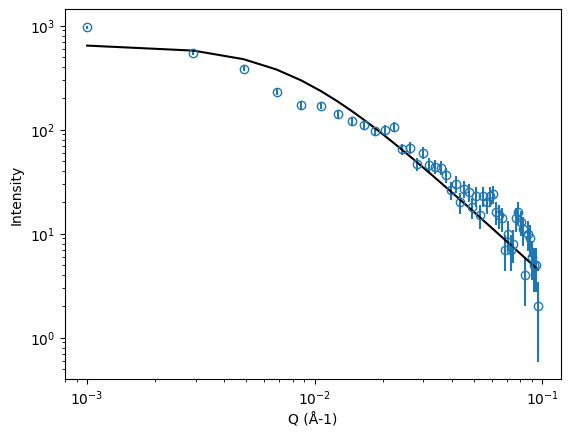

Correlation length: [125.11627005]


In [11]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

npts=2000

c1 = 50.0 # correlation length in system
c2 = 400.0

kappa = 1.0 / c1
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, npts)

kappa2 = 1.0 / c2
curv2 = emtk.lorentzianCurve()
pvalues = np.array([kappa2])
curv2.generateTestSamples(pvalues, xrange, npts)

curv.data = np.concatenate((curv2.data, curv.data))
np.random.shuffle(curv.data)

#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)
print("Correlation length:", 1.0/curv.estimates)

Yes, with multi-modal data it finds some middle-ground.  For arbitrary distributions, an iterative solution is required.  This means something like maximum-entropy, lucy-richardson (kind of iterative bayesian inference), or similar, so that tweaking one bin might help with convergence to optimality of another bin somewhere else.  Bayesian inference in the form above does not do this, which is why it cannot handle multi-modal distributions all that well.

# Real Data

## Work in progress... 

1. ~~Get mantid working (the ISIS "standard" data set comes with mantid to reduce it)~~ done
2. **Check the fits with histogrammed data** - in progress
3. Try event mode using same methods.  This needs a look at the routines and grab just the part that converts TOF and angle into Q for each data point, so we have a big list of Qs.  This has been done on all major instruments and there is no point in reinventing the wheel.

Future tasks / problems:

4. ~~SANS correction of sample can, background, and transmission - how to do for each Q point without histogramming.  The solution I'm sure is **kernel density estimation** which we discussed earlier in the project.~~  Done with KDE, actually this was quite easy so I did this first.

In [ ]:
There are some tests using real-world data that are on-going.  See the files 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

loqdata = h5py.File("data/SANS/LOQ/refdata/GFP_10mgml.h5", 'r+')

print(loqdata.keys())
print(type(loqdata['sasentry01']))
entry=loqdata['sasentry01']
print(list(entry))
print(list(entry['sasdata']))
dat=entry['sasdata']
daty = np.array(dat['I'])
datx = np.array(dat['Q'])

<KeysViewHDF5 ['sasentry01']>
<class 'h5py._hl.group.Group'>
['definition', 'run', 'sasdata', 'sasinstrument', 'sasprocess', 'title']
['I', 'Idev', 'Q']


The analysis in the LOQ reference data paper (Myatt et al, DOI 10.3233/BSI-170167).  They were
plotting Guinnier plots, which assumes I(Q) = I0 * Exp(-Q**2 * R**2 / 3)

Text(0.5, 1.0, 'Guinier Plot of all data')

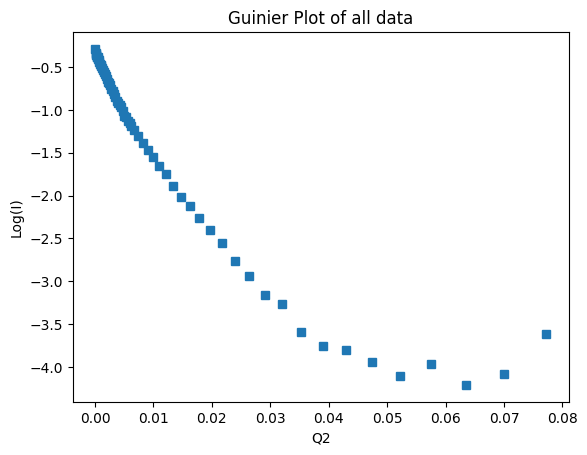

In [2]:
fig,ax=plt.subplots()
logi = np.log(daty)
q2 = datx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Guinier Plot of all data')

Note that the data in the paper, figure 5, inset, has a maximum Q2 tick of 0.005.  There are 5 data points after that.  This corresponds to Q=0.07, so only the first half of the data is following Guiner scattering law.

Text(0.5, 1.0, 'Guinier Plot of Truncated Data')

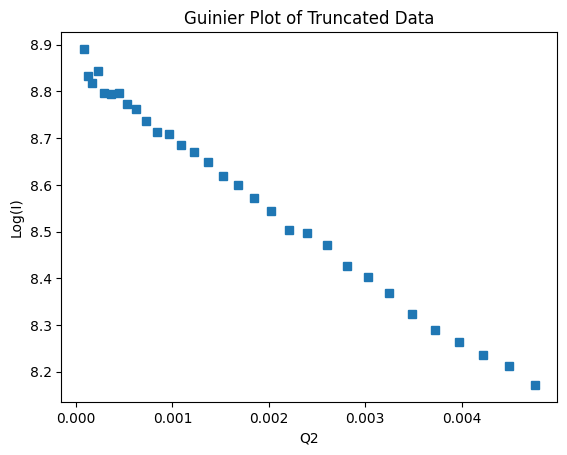

In [197]:
nnpts = datx.size / 2

mask = np.arange(nnpts).astype(int)
gunx = datx[mask]
guny = daty[mask]

scale = 3540.0 * 1.0 / np.amin(guny)#* 11.4

# Must scale up the y to sensible values.  This is calculated from the standard deviation of the fit errors and the x2 values
guny = guny * scale



fig,ax=plt.subplots()
logi = np.log(guny)
q2 = gunx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Guinier Plot of Truncated Data')

In [198]:
# Lucy Richardson - this is tried first because MLE was not working.
# We will soon discover why MLE did not work!
import matplotlib.pyplot as plt

from importlib import reload

reload(bayesianInverse)

model = bayesianInverse.bayesianGuinier()

model.datax = np.array(gunx)
model.datay = np.array(guny)

resto, errors = model.LR_deconv(niter=200, calcErrors=True)

Lucy-Richardson fit converged after 4 iterations.
x2= 0.9977061912058197


Text(0, 0.5, 'P(r)')

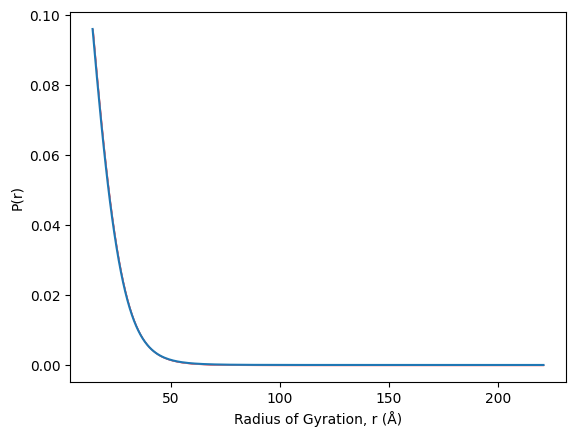

In [199]:
fity = model.getfity(resto, model.psf)

dats = np.sum(guny)
fits = np.sum(fity)
fity = fity * dats/fits

psf, rvals = model.calc_psf()

top = resto+errors

bot = np.maximum(resto-errors, np.zeros_like(resto))

fig, ax = plt.subplots()
ax.plot(rvals, resto)

ax.fill_between(rvals, top, bot, color='red', alpha=0.5)

ax.set_xlabel("Radius of Gyration, r (Å)")
ax.set_ylabel("P(r)")

Text(0.7, 0.95, '$\\chi ^{2}$=0.9977')

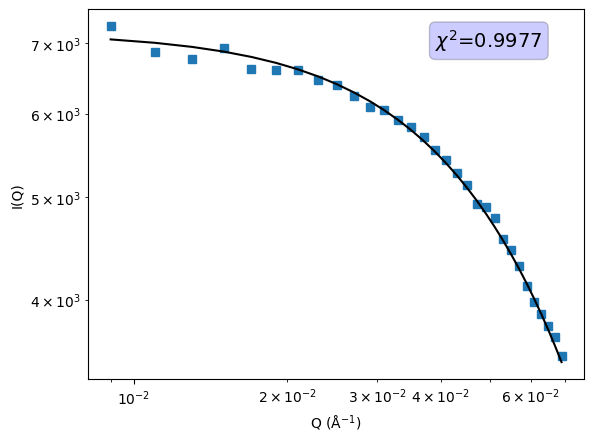

In [200]:
fig, ax = plt.subplots()
ax.plot(gunx, guny, 's')
ax.plot(gunx, fity, color='black')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Q (Å$^{-1}$)")
ax.set_ylabel("I(Q)")

chisq = model.x2(guny, fity)

insetstr = ''.join((r'$\chi ^{2}$=%.4f' % (chisq/guny.size)))
decs = dict(boxstyle='round', facecolor='blue', alpha=0.2)
ax.text(0.7, 0.95, insetstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=decs)



OK so NOW we can see what is wrong.  Because the y values are normalised to some tiny value, the analysis is not working.  The assumption in this code is that the neutron intensity is measured in counts.  This data is not!  The fit itself is OK for one iteration(!) but the x2 value is total nonsense.

[ 14. 111.]
[9.38248228e-39] [9.68632143e-20]


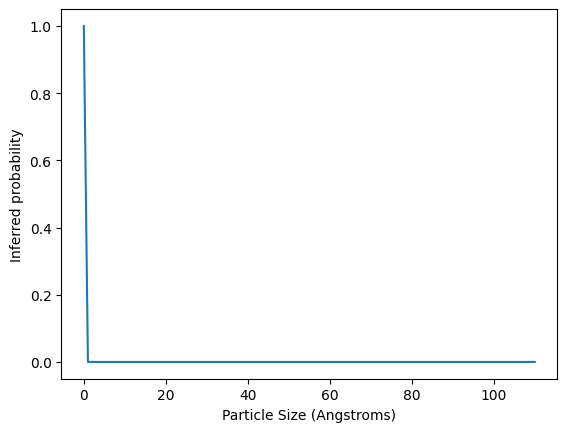

In [201]:
import bayesianInverse
import matplotlib.pyplot as plt

from importlib import reload

reload(bayesianInverse)

model = bayesianInverse.bayesianGuinier()

scale = 3540.0 * 1.0 / np.amin(guny)#* 11.4

# Must scale up the y to sensible values.  This is calculated from the standard deviation of the fit errors and the x2 values
guny = guny * scale


model.datax = np.array(gunx)
model.datay = np.array(guny)
    
model.infer(plotr=True)

print(model.estimates, model.variances)

The analysis in the LOQ reference data paper (Myatt et al, DOI 10.3233/BSI-170167), asserts that R = 20.8

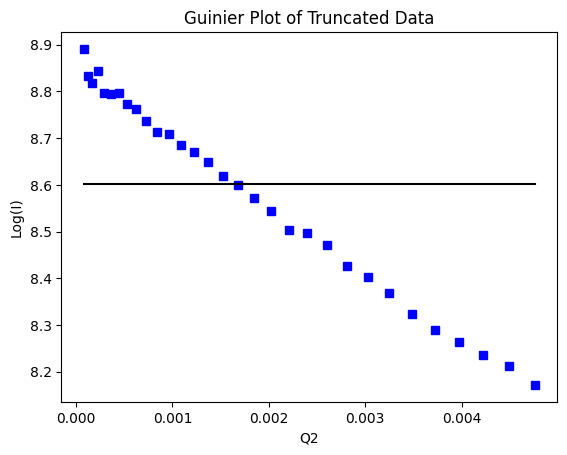

In [202]:
model.plotfit()

In [102]:
np.sqrt(3.0*0.7/0.005)

20.493901531919196

The data itself is quite close to Rg=21 as the paper suggests.  There is obviously a bug somewhere in this guinier function, but I can't find it.

In [41]:
import bayesianInverse
import matplotlib.pyplot as plt

from importlib import reload

reload(bayesianInverse)

model = bayesianInverse.bayesianGuinier()

# Must scale up the y so it's relative to the smallest entry
#scl = 1.0 / guny[guny.size-1]

model.datax = np.array(gunx)
model.datay = np.array(guny)
    
model.LR_deconv()

print(model.estimates, model.variances)

[0.56076801 0.56076801 0.560768   0.560768   0.560768   0.56076799
 0.56076799 0.56076798 0.56076797 0.56076797 0.56076796 0.56076795
 0.56076795 0.56076794 0.56076793 0.56076792 0.56076791 0.5607679
 0.56076789 0.56076788 0.56076786 0.56076785 0.56076784 0.56076782
 0.56076781 0.5607678  0.56076778 0.56076777 0.56076775 0.56076773
 0.56076772]
x2= 0.022649129200045585
Lucy-Richardson fit converged after 1 iterations.
[None] [None]


What does LSE think of this?

[ 0.722892   21.20619308]


Text(0.5, 1.0, 'LSE Guinier Plot')

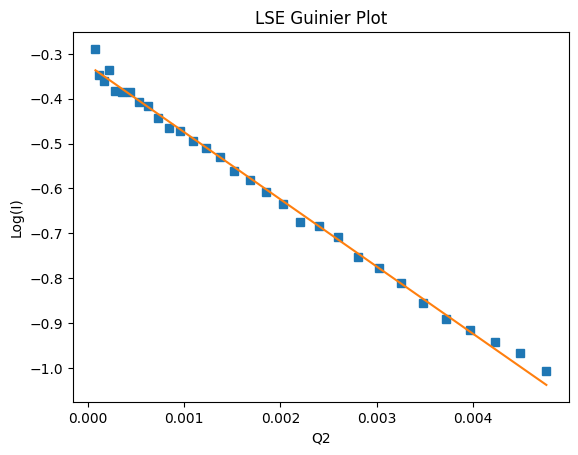

In [9]:
import numpy as np

from scipy.optimize import curve_fit

def guinierApprox(x, amp, rad):
    return amp * np.exp(-x*x*rad*rad/3.0)

initvals = [1.0, 20.0]
fitvals, cov = curve_fit(guinierApprox, gunx, guny, p0=initvals)
print(fitvals)

fity = guinierApprox(gunx, fitvals[0], fitvals[1])

fig,ax=plt.subplots()
logi = np.log(guny)
logf = np.log(fity)
q2 = gunx ** 2.0
ax.plot(q2, logi,'s')
ax.plot(q2, logf)
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('LSE Guinier Plot')

{'amplitude': 0.15204014795845996, 'center': 0.0, 'sigma': 0.0633948065699943, 'fwhm': 0.1267896131399886, 'height': 0.7634045580564809}
R= 15.774162807735655


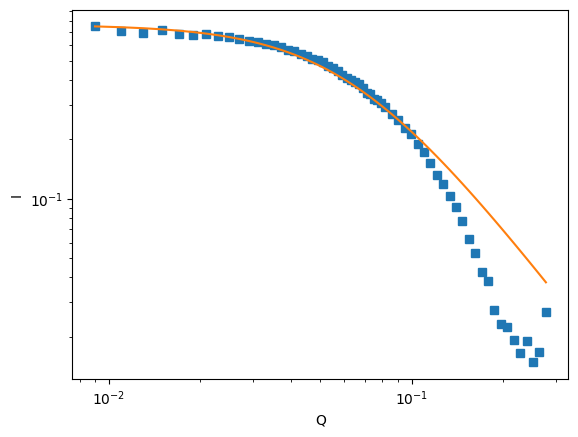

In [15]:
from lmfit import models
from scipy import stats

lse = models.LorentzianModel()

params = lse.make_params()
params['center'].value=0.0
params['center'].vary=False

#print(params)

lsefit = lse.fit(daty, params, x=datx)
print(lsefit.values)

print("R=", 1.0 / lsefit.values['sigma'])

fig,ax=plt.subplots()
ax.plot(datx, daty,'s')
ax.plot(datx, lsefit.best_fit)
ax.set_xlabel('Q')
ax.set_ylabel('I')
ax.set_title('')
ax.set_yscale('log')
ax.set_xscale('log')

Text(0.5, 1.0, 'Only first half of data follows Guinier law')

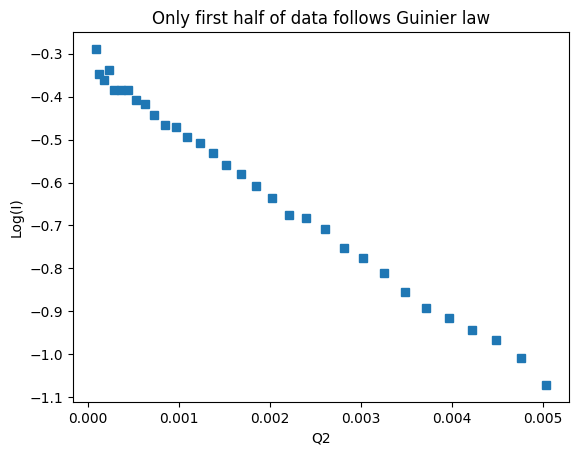

In [16]:
num2delete = 30
range1 = datx.size - num2delete
range2 = datx.size
mask = np.arange(range1, range2, 1)

clipx = np.copy(datx)
clipx=np.delete(clipx, mask)
clipy = np.copy(daty)
clipy=np.delete(clipy, mask)

fig,ax=plt.subplots()
logi = np.log(clipy)
q2 = clipx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Only first half of data follows Guinier law')


The early part of the curve is lorentzian, but that corresponds to a much smaller R value of 16 Angstroms.

That's basically the range as used in the paper

[105.13339945] [115.77821687]


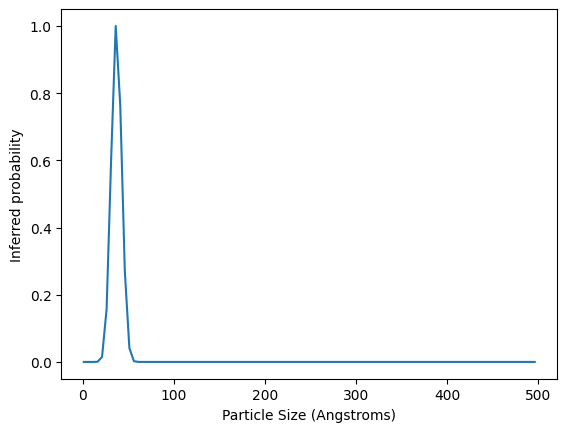

In [18]:
lor.datax = np.array(clipx)
lor.datay = np.array(clipy)
    
lor.infer(plotr=True)

print(lor.estimates, lor.variances)

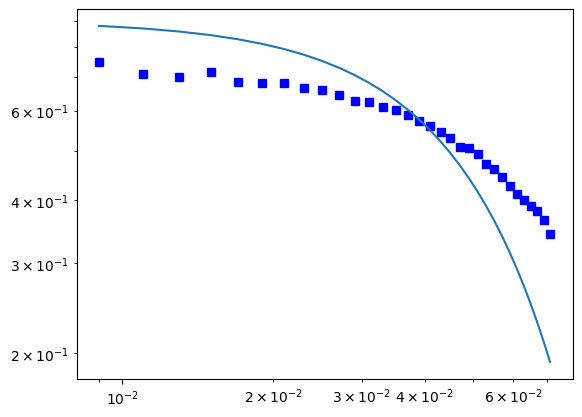

In [19]:
lor.plotfit()

That is pretty bad!

In [71]:
def unbin(xx, yy, samples):
    sum = np.sum(yy)    
    scale = samples / sum
    yy = yy * scale
    
    print("Resampling histogram of size", yy.size, "with", samples, "samples")
    
    result = np.empty(0)
    
    for bin in np.arange(xx.size):
        nn = int(np.round(yy[bin]))
        chunk = np.full(nn, xx[bin])
        result = np.append(result, chunk)
    
    np.random.shuffle(result)
    
    return result
        

        
sp = unbin(clipx, clipy, 20000)


Resampling histogram of size 32 with 20000 samples


Lorentzian curve maximum likelihood estimation
19999 data points
[0.0001] as initial guess (kappa)
[0.03191863]  +/- [0.00131522]? solution obtained numerically
[0.03191863] solution obtained numerically
That a maximum was found is True via second derivative
[1218.97518911 1175.96227587 1129.23443107 1079.9997585  1029.35866903
  978.26936077  927.53180594  877.78659406  829.52435926  783.10174403
  738.76055073  696.64759867  656.8336354   619.33034203  584.1049892
  551.09265345  520.20612125  491.34372565  464.39540867  439.24730749
  415.78514195  393.89664862  373.47326968  354.41126916  336.61241572
  319.98434326  304.44067609  289.90098606  276.29063316  263.54052836
  251.58684784  240.37071992]
[845 798 786 805 769 768 768 751 743 725 708 704 688 678 664 644   0 631
 614 598 574 570 556 531 519 501 480 463 451 439 429 412]


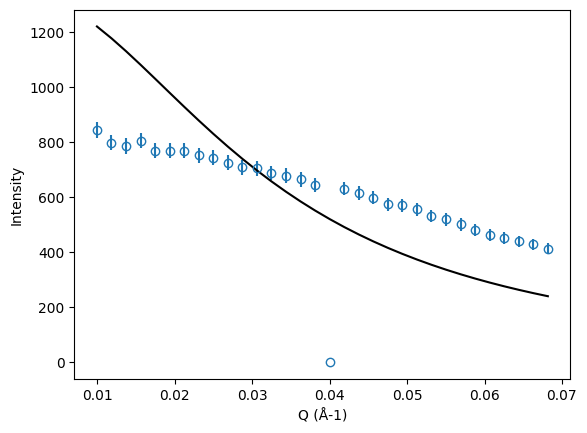

In [72]:
import emtk

from importlib import reload
reload(emtk)

curv = emtk.lorentzianCurve()
curv.data = sp
curv.setupGuesses()
curv.mle()
curv.report()
curv.plotFit(logarithmic=False, nbins=32)



{'amplitude': 0.15986149179375336, 'center': 0.0, 'sigma': 0.06836649150340146, 'fwhm': 0.13673298300680292, 'height': 0.7443046198178639}
R= 14.627048690223436


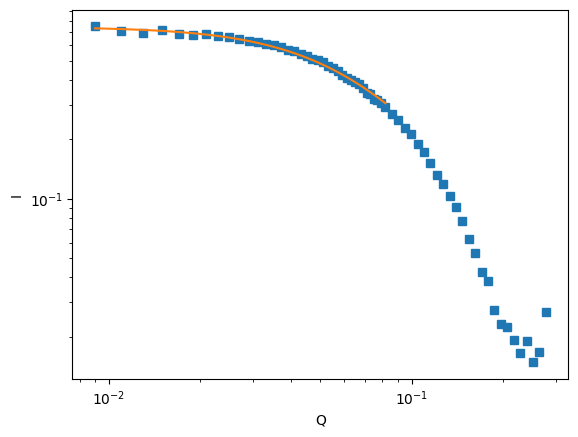

In [23]:
lse = models.LorentzianModel()

params = lse.make_params()
params['center'].value=0.0
params['center'].vary=False

#print(params)

lsefit = lse.fit(clipy, params, x=clipx)
print(lsefit.values)

print("R=", 1.0 / lsefit.values['sigma'])

fig,ax=plt.subplots()
ax.plot(datx, daty,'s')
ax.plot(clipx, lsefit.best_fit)
ax.set_xlabel('Q')
ax.set_ylabel('I')
ax.set_title('')
ax.set_yscale('log')
ax.set_xscale('log')

# Missing Features List

The following might be interesting
* pytest? --- done
* distribution & statistical testing? 
* sphinx? - like doxygen.  Read about it and rejected it

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

QUENS data is almost always lorenzian 

Also check this:
https://github.com/DAaaS-reference-data
This last one might be the most useful, it looks like a clean lorentzian curve and there is also a reflectivity curve there.

# Desired outcome

Event mode
Fit to some distribution
Plot of estimated parameter vs events used, with error bar, compared to the traditional way of doing it.
Should ask Wojciech to do an analysis with which we compared

# Links
* https://confluence.esss.lu.se/display/DCC/Owncloud (info about DMSC owncloud server)
* https://docs.google.com/document/d/1dOnBtLCSYZ__7IK479Qb8eYivxP-nBejNLA-WrmV_UA/edit (LENS board SANS standards document)
* https://marketplace.sasview.org (SASVIEW library of models, we should try to implement most of these in the end)
* https://content.iospress.com/articles/journal-of-neutron-research/jnr220002 (guidelines for development of software)

ESS does not use mantid (thank god) 

* https://easyscience.software ESS easy stuff -> easyDiffraction, easyReflectometry.
* http://github.com/scipp ESS library for handling data sets, propagating uncertainties, multi-dimensions etc.
* https://scipp.github.io/getting-started/overview.html

